In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load Dataset
file_path = "bitcoin.csv"  # Change this if necessary
df = pd.read_csv(file_path)

In [4]:
df.shape

(3652, 13)

In [5]:
# Data Cleaning
df.dropna(inplace=True)
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values("Date", inplace=True)

In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume,Month,Day,Year,Daily_Return,7-day-MA,25-day-MA,Volatility_Index
3647,2024-12-26,99297.695312,99884.570312,95137.882812,95795.515625,47054980873,12,26,2024,-0.035284,96934.662946,99160.407500,0.024803
3648,2024-12-27,95704.976562,97294.843750,93310.742188,94164.859375,52419934565,12,27,2024,-0.017022,96421.652902,99092.389688,0.023737
3649,2024-12-28,94160.187500,95525.898438,94014.289062,95163.929688,24107436185,12,28,2024,0.010610,96127.253348,99058.860312,0.023813
3650,2024-12-29,95174.054688,95174.875000,92881.789062,93530.226562,29635885267,12,29,2024,-0.017167,95902.294643,98849.328125,0.023742
3651,2024-12-30,93527.195312,94903.320312,91317.132812,92643.210938,56188003691,12,30,2024,-0.009484,95610.433036,98691.313750,0.023730


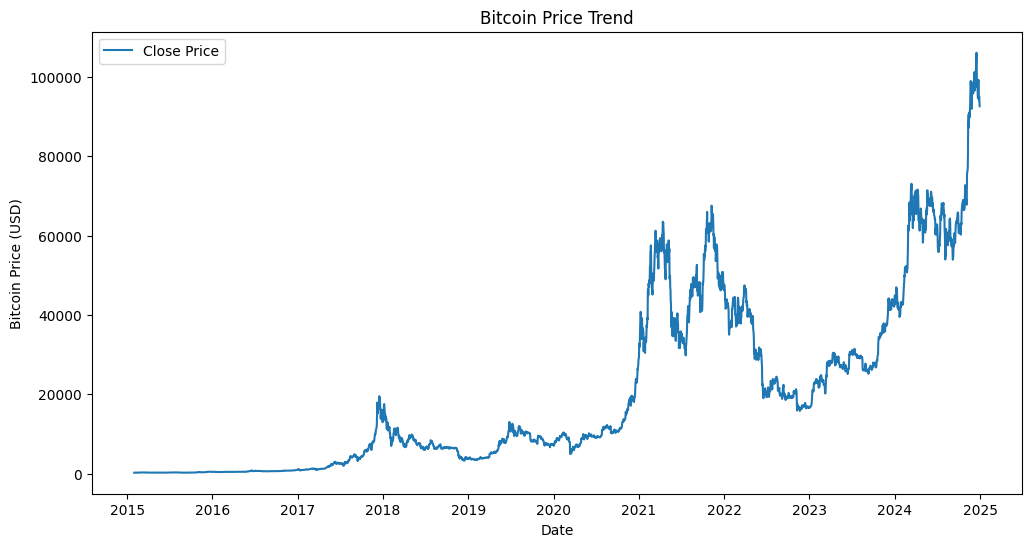

In [7]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price Trend")
plt.legend()
plt.show()

In [8]:
# Feature Selection & Preprocessing
features = ["Open", "High", "Low", "Volume", "7-day-MA", "25-day-MA", "Volatility_Index"]
target = "Close"
X = df[features]
y = df[target]

In [9]:
df.corr(numeric_only=True)

,Open,High,Low,Close,Volume,Month,Day,Year,Daily_Return,7-day-MA,25-day-MA,Volatility_Index
Open,1.000000,0.999565,0.999351,0.999062,0.660669,0.057026,0.006723,0.810329,-0.026742,0.998962,0.993341,-0.049269
High,0.999565,1.000000,0.999212,0.999607,0.666810,0.055623,0.006467,0.809002,-0.011129,0.998750,0.993067,-0.044414
Low,0.999351,0.999212,1.000000,0.999508,0.650981,0.059550,0.007164,0.812285,-0.009893,0.998318,0.992496,-0.055822
Close,0.999062,0.999607,0.999508,1.000000,0.660039,0.057136,0.006311,0.810382,0.002733,0.998301,0.992429,-0.049254
Volume,0.660669,0.666810,0.650981,0.660039,1.000000,-0.025605,-0.006975,0.629794,-0.008845,0.660629,0.650647,0.126880
Month,0.057026,0.055623,0.059550,0.057136,-0.025605,1.000000,0.009295,-0.022103,0.008166,0.056409,0.053048,-0.170628
Day,0.006723,0.006467,0.007164,0.006311,-0.006975,0.009295,1.000000,-0.000877,-0.005435,0.007663,0.010321,-0.007379
Year,0.810329,0.809002,0.812285,0.810382,0.629794,-0.022103,-0.000877,1.000000,-0.016699,0.811295,0.814766,-0.111904
Daily_Return,-0.026742,-0.011129,-0.009893,0.002733,-0.008845,0.008166,-0.005435,-0.016699,1.000000,-0.022674,-0.026886,0.011380
7-day-MA,0.998962,0.998750,0.998318,0.998301,0.660629,0.056409,0.007663,0.811295,-0.022674,1.000000,0.995779,-0.048978


In [10]:
# Normalize Data
X_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))


In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=3, random_state=42)

In [12]:
# Train the model with a Random Forest and adjust hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict using the model on the test data
y_pred = model.predict(X_test)

# Evaluate using R² score
print("R²:", r2_score(y_test, y_pred))

c:\Users\SIAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R²: 0.9808687717095603


In [13]:
from sklearn import metrics
# Metrics calculation
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

# R-squared score
print('R-squared (R²):', r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.005219384014711337
Mean Squared Error (MSE): 3.4031114435874635e-05
Root Mean Squared Error (RMSE): 0.005833619325588072
Mean Absolute Percentage Error (MAPE): 82.30561979177008
R-squared (R²): 0.9808687717095603


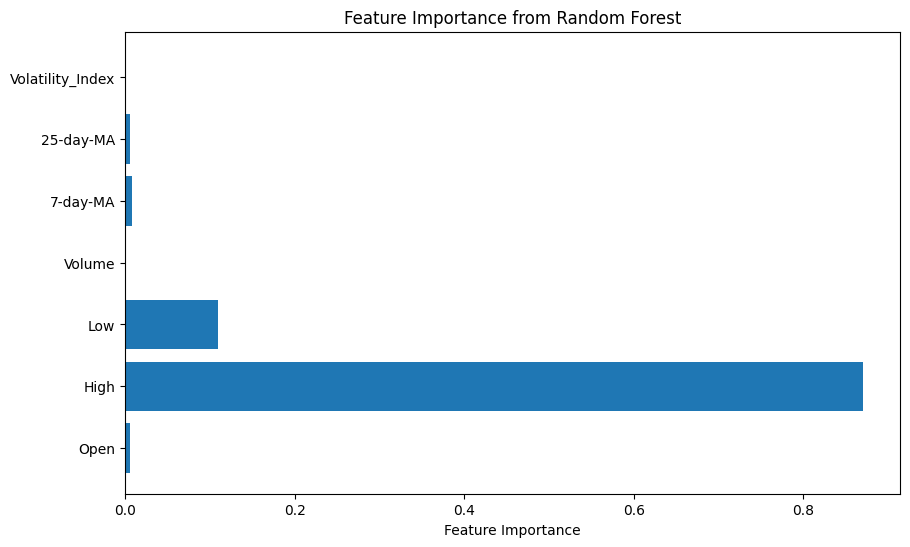

In [14]:
# Get feature importance
importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [15]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train.ravel())
best_rf_model = grid_search.best_estimator_

In [16]:
from sklearn import metrics
y_pred = best_rf_model.predict(X_test)
# Metrics calculation
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

# R-squared score
print('R-squared (R²):', r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 0.002452511132514941
Mean Squared Error (MSE): 8.335944661270837e-06
Root Mean Squared Error (RMSE): 0.0028872036057872395
Mean Absolute Percentage Error (MAPE): 80.0683429465296
R-squared (R²): 0.9953137925990714


In [17]:
# Predictions & Evaluation
y_pred_rf = best_rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - \nMAE: {mae_rf}, \nMSE: {mse_rf}, \nR2: {r2_rf}")

Random Forest - 
MAE: 0.002452511132514941, 
MSE: 8.335944661270837e-06, 
R2: 0.9953137925990714


In [18]:
# Overfitting Check
train_score_rf = best_rf_model.score(X_train, y_train)
test_score_rf = best_rf_model.score(X_test, y_test)
print(f"Random Forest - Train R2: {train_score_rf}, Test R2: {test_score_rf}")

Random Forest - Train R2: 0.9999208538081394, Test R2: 0.9953137925990714


In [19]:
# Save the trained model
joblib.dump(best_rf_model, "random_forest_model.pkl")
joblib.dump(X_scaler, "X_scaler.pkl")
joblib.dump(y_scaler, "y_scaler.pkl")

['y_scaler.pkl']

In [20]:
import numpy as np
import pandas as pd
import joblib

# Feature names (must match those used during training)
feature_names = ["Open", "High", "Low", "Volume", "7-day-MA", "25-day-MA", "Volatility_Index"]

def predict_new_data(new_data):
    X_scaler = joblib.load("X_scaler.pkl")
    y_scaler = joblib.load("y_scaler.pkl")
    model = joblib.load("random_forest_model.pkl")
    
    # Convert to DataFrame with column names
    new_data_df = pd.DataFrame(new_data, columns=feature_names)

    # Scale new data
    new_data_scaled = X_scaler.transform(new_data_df)
    
    # Make predictions
    new_rf_pred = model.predict(new_data_scaled)
    
    # Inverse transform to get original scale
    return y_scaler.inverse_transform(new_rf_pred.reshape(-1, 1))

# Example Usage
new_data = np.array([[96644.37, 97511.00, 96415.09, 15148.01, 96679.39, 98350.39, 1.53]])

rf_prediction = predict_new_data(new_data)
print(f"New Data Prediction - Random Forest: {rf_prediction}")


New Data Prediction - Random Forest: [[96656.52296875]]
